<a href="https://colab.research.google.com/github/santoshF/python/blob/master/FinanceDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science

In [ ]:
# prompt: i need data for cost of living in cities in india could you write a code

import pandas as pd

# You can replace this with a URL to a CSV file containing cost of living data
data = {
    'City': ['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata'],
    'Rent (1-bedroom)': [25000, 18000, 15000, 12000, 10000],
    'Groceries': [8000, 6000, 5000, 4500, 4000],
    'Transportation': [3000, 2500, 2000, 1800, 1500]
}

df = pd.DataFrame(data)


df['Cost of Living'] = df['Rent (1-bedroom)'] + df['Groceries'] + df['Transportation']
print(df.dtypes)

df.describe(include='all')




City                object
Rent (1-bedroom)     int64
Groceries            int64
Transportation       int64
Cost of Living       int64
dtype: object


,City,Rent (1-bedroom),Groceries,Transportation,Cost of Living
count,5,5.000000,5.00000,5.000000,5.000000
unique,5,NaN,NaN,NaN,NaN
top,Mumbai,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,16000.000000,5500.00000,2160.000000,23660.000000
std,NaN,5873.670062,1581.13883,594.138031,8037.599144
min,NaN,10000.000000,4000.00000,1500.000000,15500.000000
25%,NaN,12000.000000,4500.00000,1800.000000,18300.000000
50%,NaN,15000.000000,5000.00000,2000.000000,22000.000000
75%,NaN,18000.000000,6000.00000,2500.000000,26500.000000


# Used Cars

In [ ]:
# prompt: using get method create a dataframe with the link "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

import pandas as pd
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")
df.head()
df.columns

#df.to_csv("automobileEDA.csv", index=False)

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [ ]:
import numpy as np

df1 =df.replace('?',np.NaN)

In [ ]:
df=df1.dropna(subset=["price"], axis=0)
df.head(20)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

(0.0, 53159.75737142773)

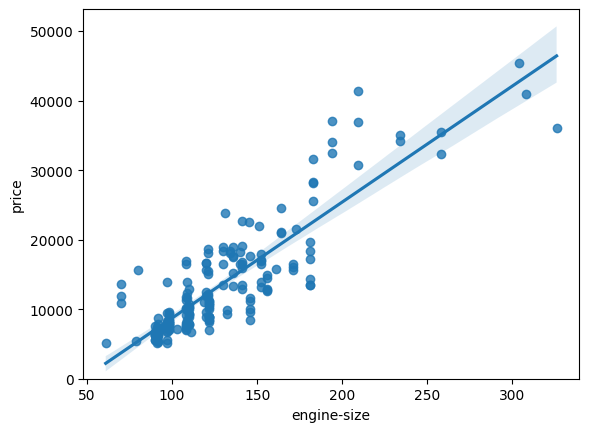

In [ ]:
# prompt: using seaborn correlation between engine-size and price

import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)


In [ ]:
df.to_csv("automobile.csv", index=False)

In [ ]:
# prompt: count missing values in columns

missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")


In [ ]:
df.dtypes

In [ ]:
df.describe(include="all")

0.4965911884339176


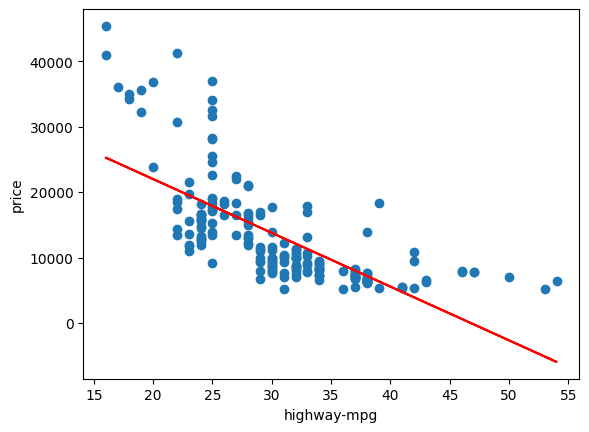

In [ ]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

X = df[['highway-mpg']]

Y = df['price']

lm.fit(X, Y)

Yhat=lm.predict(X)

out=lm.score(X, Y)
print(out)

plt.scatter(X, Y)
plt.plot(X, Yhat, c="r")
plt.xlabel("highway-mpg")
plt.ylabel("price")
plt.show()

# Laptop

In [ ]:
# prompt: using request library , create a data frame from the data in the url , "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"

import requests
import numpy as np
import pandas as pd


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"
res = requests.get(url)
with open('laptops.csv', 'wb') as f:
  f.write(res.content)
df = pd.read_csv('laptops.csv')

df.to_csv("laptops.csv", index=False)
df.head(5)


,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6.1,978
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


In [ ]:
headers = ["manufacture","category","IPS_Panel","gpu","os","cpu_core","screen_size_cm","CPU_frequency","Ram_GB","Storage_GB_SSD","Weight_kg","price"]
df.columns = headers
df.head(5)

,manufacture,category,IPS_Panel,gpu,os,cpu_core,screen_size_cm,CPU_frequency,Ram_GB,Storage_GB_SSD,Weight_kg,price
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


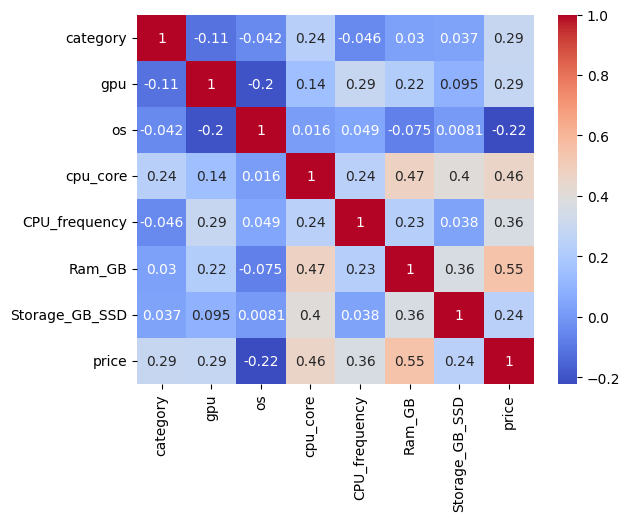

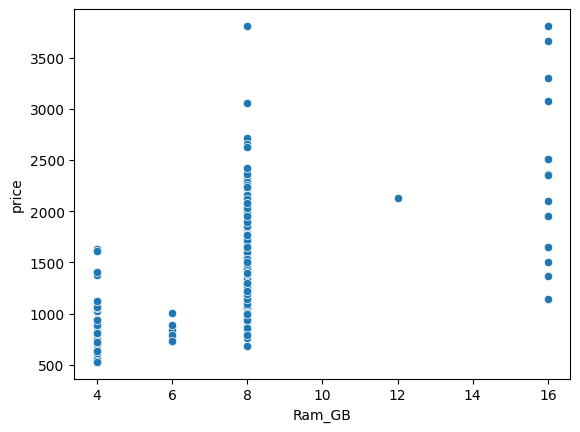

In [ ]:
# prompt: Using dataframe df: using seaborn plot a correlation between which has a high correlation

import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr = df.select_dtypes(include=['float', 'int']).corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
# From the heatmap we can see that Ram_GB and price has a high correlation
sns.scatterplot(x='Ram_GB', y='price', data=df)
plt.show()


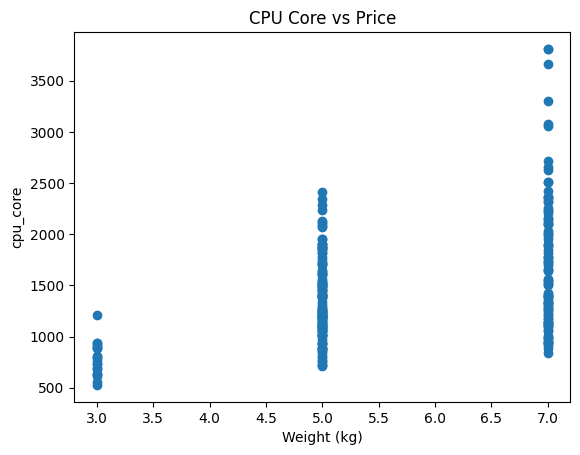

In [ ]:
plt.scatter(df['cpu_core'], df['price'])
plt.xlabel('Weight (kg)')
plt.ylabel('cpu_core')
plt.title('CPU Core vs Price')
plt.show()

In [ ]:
# prompt: write a code to randomly split data into test and training subset

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Split the data into training and testing sets (80% train, 20% test)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)


Training set shape: (189, 12)
Testing set shape: (48, 12)


In [ ]:
df1.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64


In [ ]:
df1 = df.replace('?',np.NaN)

In [ ]:
df1.describe(include="all")

,manufacture,category,IPS_Panel,gpu,os,cpu_core,screen_size_cm,CPU_frequency,Ram_GB,Storage_GB_SSD,Weight_kg,price
count,237,237.000000,237,237.000000,237.000000,237.000000,233,237.000000,237.000000,237.000000,232,237.000000
unique,11,NaN,2,NaN,NaN,NaN,9,NaN,NaN,NaN,77,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,39.624,NaN,NaN,NaN,2.2,NaN
freq,71,NaN,161,NaN,NaN,NaN,89,NaN,NaN,NaN,21,NaN
mean,NaN,3.202532,NaN,2.151899,1.059072,5.632911,NaN,2.363291,7.881857,245.738397,NaN,1464.388186
std,NaN,0.776450,NaN,0.639556,0.236258,1.243736,NaN,0.409271,2.487845,34.832516,NaN,574.956374
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,NaN,1.200000,4.000000,128.000000,NaN,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.000000,8.000000,256.000000,NaN,1068.000000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.500000,8.000000,256.000000,NaN,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,NaN,2.700000,8.000000,256.000000,NaN,1777.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   manufacture     237 non-null    object 
 1   category        237 non-null    int64  
 2   IPS_Panel       237 non-null    object 
 3   gpu             237 non-null    int64  
 4   os              237 non-null    int64  
 5   cpu_core        237 non-null    int64  
 6   screen_size_cm  233 non-null    object 
 7   CPU_frequency   237 non-null    float64
 8   Ram_GB          237 non-null    int64  
 9   Storage_GB_SSD  237 non-null    int64  
 10  Weight_kg       232 non-null    object 
 11  price           237 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 22.3+ KB


In [ ]:
df.rename(columns={'manufacture':'manufacturer'}, inplace=True)

In [ ]:
# prompt: write a code for grid search

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(df[['Ram_GB']], df['price'])
BestRR=Grid1.best_estimator_
BestRR
scores = Grid1.cv_results_
scores['mean_test_score']


array([ 0.01037876,  0.01037849,  0.01037577,  0.01031736,  0.00713972,
       -0.08581858, -0.3241463 , -0.39135249, -0.39135249])